In [4]:
pip install nltk

In [1]:
pip install pandas wordcloud matplotlib


In [24]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import nltk

In [9]:
# load the dataset
train_df = pd.read_csv('/content/drive/MyDrive/projectdataset/train.csv')
train_df.head()

,ind,activity_label,ctx_a,ctx_b,ctx,endings,source_id,split,split_type,label
0,4,Removing ice from car,"Then, the man writes over the snow covering th...",then,"Then, the man writes over the snow covering th...","[', the man adds wax to the windshield and cut...",activitynet~v_-1IBHYS3L-Y,train,indomain,3
1,8,Baking cookies,A female chef in white uniform shows a stack o...,the pans,A female chef in white uniform shows a stack o...,['contain egg yolks and baking soda.'\n 'are t...,activitynet~v_-2dxp-mv2zo,train,indomain,3
2,9,Baking cookies,A female chef in white uniform shows a stack o...,a knife,A female chef in white uniform shows a stack o...,['is seen moving on a board and cutting out it...,activitynet~v_-2dxp-mv2zo,train,indomain,3
3,12,Baking cookies,A tray of potatoes is loaded into the oven and...,a large tray of meat,A tray of potatoes is loaded into the oven and...,"['is placed onto a baked potato.'\n ', ls, and...",activitynet~v_-2dxp-mv2zo,train,indomain,3
4,27,Getting a haircut,The man in the center is demonstrating a hairs...,the man in the blue shirt,The man in the center is demonstrating a hairs...,['is standing on the sponge cutting the hair o...,activitynet~v_-JqLjPz-07E,train,indomain,2


In [ ]:
# train_df_print_sample_row = pd.read_csv('/Users/jyotir/DataspellProjects/NLP-Project/archive/train.csv')
# print out a sample row
# train_df_print_sample_row.iloc[0]

In [ ]:
# count number of examples by activity label
# train_df_print_sample_row['activity_label'].value_counts()

In [ ]:
# train_df

In [10]:
# train_df.shape
print("Number of rows in train dataset is: ", train_df.shape[0])
print("Number of columns in train dataset is: ", train_df.shape[1])

Number of rows in train dataset is:  39905
Number of columns in train dataset is:  10


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39905 entries, 0 to 39904
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ind             39905 non-null  int64 
 1   activity_label  39905 non-null  object
 2   ctx_a           39905 non-null  object
 3   ctx_b           14740 non-null  object
 4   ctx             39905 non-null  object
 5   endings         39905 non-null  object
 6   source_id       39905 non-null  object
 7   split           39905 non-null  object
 8   split_type      39905 non-null  object
 9   label           39905 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.0+ MB


In [12]:
# check for null values
train_df.isnull().sum()

ind                   0
activity_label        0
ctx_a                 0
ctx_b             25165
ctx                   0
endings               0
source_id             0
split                 0
split_type            0
label                 0
dtype: int64

In [13]:
# print out row numbers of null values
null_values_ctx_b = train_df[train_df.isnull().any(axis=1)].index
# null_values_ctx_b

In [14]:
# insert start token in ctx_b columns that have null values
for i in list(null_values_ctx_b):
    train_df['ctx_b'][i] = '<start>'

<ipython-input-14-6158100e4b71>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['ctx_b'][i] = '<start>'


In [15]:
# check for null values again
train_df.isnull().sum()

ind               0
activity_label    0
ctx_a             0
ctx_b             0
ctx               0
endings           0
source_id         0
split             0
split_type        0
label             0
dtype: int64

In [16]:
# train_df.shape
print("Number of rows in train dataset is: ", train_df.shape[0])
print("Number of columns in train dataset is: ", train_df.shape[1])

Number of rows in train dataset is:  39905
Number of columns in train dataset is:  10


In [17]:
train_df.head()

,ind,activity_label,ctx_a,ctx_b,ctx,endings,source_id,split,split_type,label
0,4,Removing ice from car,"Then, the man writes over the snow covering th...",then,"Then, the man writes over the snow covering th...","[', the man adds wax to the windshield and cut...",activitynet~v_-1IBHYS3L-Y,train,indomain,3
1,8,Baking cookies,A female chef in white uniform shows a stack o...,the pans,A female chef in white uniform shows a stack o...,['contain egg yolks and baking soda.'\n 'are t...,activitynet~v_-2dxp-mv2zo,train,indomain,3
2,9,Baking cookies,A female chef in white uniform shows a stack o...,a knife,A female chef in white uniform shows a stack o...,['is seen moving on a board and cutting out it...,activitynet~v_-2dxp-mv2zo,train,indomain,3
3,12,Baking cookies,A tray of potatoes is loaded into the oven and...,a large tray of meat,A tray of potatoes is loaded into the oven and...,"['is placed onto a baked potato.'\n ', ls, and...",activitynet~v_-2dxp-mv2zo,train,indomain,3
4,27,Getting a haircut,The man in the center is demonstrating a hairs...,the man in the blue shirt,The man in the center is demonstrating a hairs...,['is standing on the sponge cutting the hair o...,activitynet~v_-JqLjPz-07E,train,indomain,2


In [18]:
# drop ind, source_id, split, split_type columns
train_df.drop(['ind', 'source_id', 'split', 'split_type'], axis=1, inplace=True)
train_df.head()

,activity_label,ctx_a,ctx_b,ctx,endings,label
0,Removing ice from car,"Then, the man writes over the snow covering th...",then,"Then, the man writes over the snow covering th...","[', the man adds wax to the windshield and cut...",3
1,Baking cookies,A female chef in white uniform shows a stack o...,the pans,A female chef in white uniform shows a stack o...,['contain egg yolks and baking soda.'\n 'are t...,3
2,Baking cookies,A female chef in white uniform shows a stack o...,a knife,A female chef in white uniform shows a stack o...,['is seen moving on a board and cutting out it...,3
3,Baking cookies,A tray of potatoes is loaded into the oven and...,a large tray of meat,A tray of potatoes is loaded into the oven and...,"['is placed onto a baked potato.'\n ', ls, and...",3
4,Getting a haircut,The man in the center is demonstrating a hairs...,the man in the blue shirt,The man in the center is demonstrating a hairs...,['is standing on the sponge cutting the hair o...,2


In [19]:
train_df_temp = train_df.copy()

In [ ]:
# for i in range(len(train_df)):
#     if(len(train_df['endings'][i].split('\n')) != 4):
#         print(i)


In [ ]:
# train_df = train_df_temp.copy()

In [20]:
a0_list = []
a1_list = []
a2_list = []
a3_list = []
# split endings column into 4 separate columns iterating over row and checking for quotes
for i in range(len(train_df)):
    count = 0
    str_0 = ''
    str_1 = ''
    str_2 = ''
    str_3 = ''

    flag_single_quote = 0
    flag_double_quote = 0

    for j in train_df['endings'][i]:


        if(j == '\'' and flag_single_quote == 1):
            flag_single_quote = 0
            count += 1
            continue

        if(j == '\"' and flag_double_quote == 1):
            flag_double_quote = 0
            count += 1
            continue

        # if flag_single_quote==0 and flag_double_quote==0:
        #     continue


        if(j == '\'' and flag_single_quote == 0 and flag_double_quote != 1):
            flag_single_quote = 1
            count += 1

        if(flag_single_quote == 1 and flag_double_quote != 1):
            if(count == 1):
                str_0 += j
            elif(count == 3):
                str_1 += j
            elif(count == 5):
                str_2 += j
            elif(count == 7):
                str_3 += j

        if(j == '\"' and flag_double_quote == 0 and flag_single_quote != 1):
            flag_double_quote = 1
            count += 1

        if(flag_double_quote == 1 and flag_single_quote != 1):
            if(count == 1):
                str_0 += j
            elif(count == 3):
                str_1 += j
            elif(count == 5):
                str_2 += j
            elif(count == 7):
                str_3 += j

    a0_list.append(str_0)
    a1_list.append(str_1)
    a2_list.append(str_2)
    a3_list.append(str_3)


        #
        # elif(j == '\'' and flag_single_quote == 1):
        #     flag_single_quote = 0
        #
        # if(j == '\"' and flag_double_quote == 0):
        #     flag_double_quote = 1
        # elif(j == '\"' and flag_double_quote == 1):
        #     flag_double_quote = 0
        #
        #
        # if(j == '\'' or j == '\"'):
        #     count += 1
        # if(count == 1):
        #     str_0 += j
        # elif(count == 3):
        #     str_1 += j
        # elif(count == 5):
        #     str_2 += j
        # elif(count == 7):
        #     str_3 += j






In [21]:
# drop endings column
train_df.drop(['endings'], axis=1, inplace=True)

# insert the 4 new columns into the dataframe before the labels column
train_df.insert(4, 'A0', a0_list)
train_df.insert(5, 'A1', a1_list)
train_df.insert(6, 'A2', a2_list)
train_df.insert(7, 'A3', a3_list)

train_df.head()

,activity_label,ctx_a,ctx_b,ctx,A0,A1,A2,A3,label
0,Removing ice from car,"Then, the man writes over the snow covering th...",then,"Then, the man writes over the snow covering th...","', the man adds wax to the windshield and cuts...","', a person board a ski lift, while two men su...","', the man puts on a christmas coat, knitted w...","', the man continues removing the snow on his ...",3
1,Baking cookies,A female chef in white uniform shows a stack o...,the pans,A female chef in white uniform shows a stack o...,'contain egg yolks and baking soda.,'are then sprinkled with brown sugar.,'are placed in a strainer on the counter.,'are filled with pastries and loaded into the ...,3
2,Baking cookies,A female chef in white uniform shows a stack o...,a knife,A female chef in white uniform shows a stack o...,'is seen moving on a board and cutting out its...,"'hits the peeled cheesecake, followed by slice...",'etches a shape into the inside of the baked p...,'is used to cut cylinder shaped dough into rou...,3
3,Baking cookies,A tray of potatoes is loaded into the oven and...,a large tray of meat,A tray of potatoes is loaded into the oven and...,'is placed onto a baked potato.,"', ls, and pickles are placed in the oven.",'is poured into a midden.,'is prepared then it is removed from the oven ...,3
4,Getting a haircut,The man in the center is demonstrating a hairs...,the man in the blue shirt,The man in the center is demonstrating a hairs...,'is standing on the sponge cutting the hair of...,'is doing the hairstyle with his hand and the ...,'sits on the chair next to the sink.,'is being shown eye to eye.,2


In [22]:
train_df

,activity_label,ctx_a,ctx_b,ctx,A0,A1,A2,A3,label
0,Removing ice from car,"Then, the man writes over the snow covering th...",then,"Then, the man writes over the snow covering th...","', the man adds wax to the windshield and cuts...","', a person board a ski lift, while two men su...","', the man puts on a christmas coat, knitted w...","', the man continues removing the snow on his ...",3
1,Baking cookies,A female chef in white uniform shows a stack o...,the pans,A female chef in white uniform shows a stack o...,'contain egg yolks and baking soda.,'are then sprinkled with brown sugar.,'are placed in a strainer on the counter.,'are filled with pastries and loaded into the ...,3
2,Baking cookies,A female chef in white uniform shows a stack o...,a knife,A female chef in white uniform shows a stack o...,'is seen moving on a board and cutting out its...,"'hits the peeled cheesecake, followed by slice...",'etches a shape into the inside of the baked p...,'is used to cut cylinder shaped dough into rou...,3
3,Baking cookies,A tray of potatoes is loaded into the oven and...,a large tray of meat,A tray of potatoes is loaded into the oven and...,'is placed onto a baked potato.,"', ls, and pickles are placed in the oven.",'is poured into a midden.,'is prepared then it is removed from the oven ...,3
4,Getting a haircut,The man in the center is demonstrating a hairs...,the man in the blue shirt,The man in the center is demonstrating a hairs...,'is standing on the sponge cutting the hair of...,'is doing the hairstyle with his hand and the ...,'sits on the chair next to the sink.,'is being shown eye to eye.,2
...,...,...,...,...,...,...,...,...,...
39900,Computers and Electronics,[header] How to merge documents in microsoft w...,<start>,[header] How to merge documents in microsoft w...,"'[step] As you click, the lower blue button in...",'[title] Click on insert in the menu bar. [tit...,"'[step] Make sure the "" edit "" button is locat...",'[step] The asterisk will appear in the docume...,1
39901,Sports and Fitness,[header] How to teach a bulldog to skateboard ...,<start>,[header] How to teach a bulldog to skateboard ...,'[title] Introduce your dog to the skateboard....,"""Above all, have the board's axis facing away ...",'The extra height will influence your point of...,'Much less width can cause injury to your pup....,0
39902,Food and Entertaining,[header] How to air dry fruit [title] Wash and...,<start>,[header] How to air dry fruit [title] Wash and...,"'[step] Keep slices equally sized, so all the ...","'[step] Slice each fruit into segments, and pe...",'[step] If you do not know the exact dryness o...,'[step] Make sure to cut the flesh with your f...,0
39903,Sports and Fitness,[header] How to be a good fast bowler [title] ...,<start>,[header] How to be a good fast bowler [title] ...,'[substeps] When a few balls come over the sea...,"""The ball should fit snugly in your hand, with...","""Grip the ball firmly and count to ten from th...","'Alternatively, place your index and middle fi...",1


In [ ]:
# train_df_copy = train_df.copy()
# THIS IS ORIGINAL COPY OF THE DATAFRAME
# train_df_copy

,activity_label,ctx_a,ctx_b,ctx,A0,A1,A2,A3,label
0,Removing ice from car,"Then, the man writes over the snow covering th...",then,"Then, the man writes over the snow covering th...","', the man adds wax to the windshield and cuts...","', a person board a ski lift, while two men su...","', the man puts on a christmas coat, knitted w...","', the man continues removing the snow on his ...",3
1,Baking cookies,A female chef in white uniform shows a stack o...,the pans,A female chef in white uniform shows a stack o...,'contain egg yolks and baking soda.,'are then sprinkled with brown sugar.,'are placed in a strainer on the counter.,'are filled with pastries and loaded into the ...,3
2,Baking cookies,A female chef in white uniform shows a stack o...,a knife,A female chef in white uniform shows a stack o...,'is seen moving on a board and cutting out its...,"'hits the peeled cheesecake, followed by slice...",'etches a shape into the inside of the baked p...,'is used to cut cylinder shaped dough into rou...,3
3,Baking cookies,A tray of potatoes is loaded into the oven and...,a large tray of meat,A tray of potatoes is loaded into the oven and...,'is placed onto a baked potato.,"', ls, and pickles are placed in the oven.",'is poured into a midden.,'is prepared then it is removed from the oven ...,3
4,Getting a haircut,The man in the center is demonstrating a hairs...,the man in the blue shirt,The man in the center is demonstrating a hairs...,'is standing on the sponge cutting the hair of...,'is doing the hairstyle with his hand and the ...,'sits on the chair next to the sink.,'is being shown eye to eye.,2
...,...,...,...,...,...,...,...,...,...
39900,Computers and Electronics,[header] How to merge documents in microsoft w...,<start>,[header] How to merge documents in microsoft w...,"'[step] As you click, the lower blue button in...",'[title] Click on insert in the menu bar. [tit...,'[step] Make sure the,""" button is located in the menu. [substeps] De...",1
39901,Sports and Fitness,[header] How to teach a bulldog to skateboard ...,<start>,[header] How to teach a bulldog to skateboard ...,'[title] Introduce your dog to the skateboard....,"""Above all, have the board","'s feet, start spinning it.",'The extra height will influence your point of...,0
39902,Food and Entertaining,[header] How to air dry fruit [title] Wash and...,<start>,[header] How to air dry fruit [title] Wash and...,"'[step] Keep slices equally sized, so all the ...","'[step] Slice each fruit into segments, and pe...",'[step] If you do not know the exact dryness o...,'[step] Make sure to cut the flesh with your f...,0
39903,Sports and Fitness,[header] How to be a good fast bowler [title] ...,<start>,[header] How to be a good fast bowler [title] ...,'[substeps] When a few balls come over the sea...,"""The ball should fit snugly in your hand, with...","""\n",'t be able to use any of the fingers for long ...,1


In [ ]:
# train_df = train_df_copy.copy()

In [25]:
# preprocess the text data
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words = stopwords.words('english')


def preprocess_text(text):

    period_check = 0
    # check if the text starts with a period
    if text.startswith('.') and len(text) == 1:
        period_check = 1


    # convert text to lowercase
    text = text.lower()
    # Remove special characters and punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    # tokenize text
    tokens = text.split()
    # remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # lemmatize text
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]


    if(len(tokens) == 0 and period_check == 0):
        tokens.append('<start>')
    elif(len(tokens) == 0 and period_check == 1):
        tokens.append('<end>')
    # check if 'start' is the only token in the list
    elif(len(tokens) == 1 and tokens[0] == 'start'):
        tokens[0] = '<start>'

    return ' '.join(tokens)


In [26]:
train_df['ctx_a'] = train_df['ctx_a'].apply(preprocess_text) # preprocess the ctx_a column
train_df['ctx_b'] = train_df['ctx_b'].apply(preprocess_text) # preprocess the ctx_b column
train_df['ctx'] = train_df['ctx'].apply(preprocess_text) # preprocess the ctx column
train_df['A0'] = train_df['A0'].apply(preprocess_text) # preprocess the A0 column
train_df['A1'] = train_df['A1'].apply(preprocess_text) # preprocess the A1 column
train_df['A2'] = train_df['A2'].apply(preprocess_text) # preprocess the A2 column
train_df['A3'] = train_df['A3'].apply(preprocess_text) # preprocess the A3 column

train_df.head()

,activity_label,ctx_a,ctx_b,ctx,A0,A1,A2,A3,label
0,Removing ice from car,man writes snow covering window car woman wear...,<start>,man writes snow covering window car woman wear...,man add wax windshield cut,person board ski lift two men supporting head ...,man put christmas coat knitted netting,man continues removing snow car,3
1,Baking cookies,female chef white uniform show stack baking pa...,pan,female chef white uniform show stack baking pa...,contain egg yolk baking soda,sprinkled brown sugar,placed strainer counter,filled pastry loaded oven,3
2,Baking cookies,female chef white uniform show stack baking pa...,knife,female chef white uniform show stack baking pa...,seen moving board cutting content,hit peeled cheesecake followed sliced custard ...,etches shape inside baked pan,used cut cylinder shaped dough round,3
3,Baking cookies,tray potato loaded oven removed large tray cak...,large tray meat,tray potato loaded oven removed large tray cak...,placed onto baked potato,l pickle placed oven,poured midden,prepared removed oven helper done,3
4,Getting a haircut,man center demonstrating hairstyle person wear...,man blue shirt,man center demonstrating hairstyle person wear...,standing sponge cutting hair person wearing bl...,hairstyle hand hairspray,sits chair next sink,shown eye eye,2


In [27]:
train_df

,activity_label,ctx_a,ctx_b,ctx,A0,A1,A2,A3,label
0,Removing ice from car,man writes snow covering window car woman wear...,<start>,man writes snow covering window car woman wear...,man add wax windshield cut,person board ski lift two men supporting head ...,man put christmas coat knitted netting,man continues removing snow car,3
1,Baking cookies,female chef white uniform show stack baking pa...,pan,female chef white uniform show stack baking pa...,contain egg yolk baking soda,sprinkled brown sugar,placed strainer counter,filled pastry loaded oven,3
2,Baking cookies,female chef white uniform show stack baking pa...,knife,female chef white uniform show stack baking pa...,seen moving board cutting content,hit peeled cheesecake followed sliced custard ...,etches shape inside baked pan,used cut cylinder shaped dough round,3
3,Baking cookies,tray potato loaded oven removed large tray cak...,large tray meat,tray potato loaded oven removed large tray cak...,placed onto baked potato,l pickle placed oven,poured midden,prepared removed oven helper done,3
4,Getting a haircut,man center demonstrating hairstyle person wear...,man blue shirt,man center demonstrating hairstyle person wear...,standing sponge cutting hair person wearing bl...,hairstyle hand hairspray,sits chair next sink,shown eye eye,2
...,...,...,...,...,...,...,...,...,...
39900,Computers and Electronics,header merge document microsoft word title ope...,<start>,header merge document microsoft word title ope...,step click lower blue button lower left hand c...,title click insert menu bar title click filene...,step make sure edit button located menu subste...,step asterisk appear document clicked adding n...,1
39901,Sports and Fitness,header teach bulldog skateboard title find rig...,<start>,header teach bulldog skateboard title find rig...,title introduce dog skateboard step begin putt...,board axis facing away dog title board inch do...,extra height influence point view 10 20 meter ...,much le width cause injury pup let elbow get c...,0
39902,Food and Entertaining,header air dry fruit title wash peel fruit ste...,<start>,header air dry fruit title wash peel fruit ste...,step keep slice equally sized piece dry amount...,step slice fruit segment peel bottom substeps ...,step know exact dryness firmness fruit dab lit...,step make sure cut flesh finger slice fruit ha...,0
39903,Sports and Fitness,header good fast bowler title take grip thats ...,<start>,header good fast bowler title take grip thats ...,substeps ball come seam ball stay middle finge...,ball fit snugly hand wiggling slipping substep...,grip ball firmly count ten substeps hold grip ...,alternatively place index middle finger overla...,1


In [ ]:
# train_df_pre_lemmatizing = train_df.copy()
# train_df_pre_lemmatizing

,activity_label,ctx_a,ctx_b,ctx,A0,A1,A2,A3,label
0,Removing ice from car,man writes snow covering window car woman wear...,<start>,man writes snow covering window car woman wear...,man adds wax windshield cuts,person board ski lift two men supporting head ...,man puts christmas coat knitted netting,man continues removing snow car,3
1,Baking cookies,female chef white uniform shows stack baking p...,pans,female chef white uniform shows stack baking p...,contain egg yolks baking soda,sprinkled brown sugar,placed strainer counter,filled pastries loaded oven,3
2,Baking cookies,female chef white uniform shows stack baking p...,knife,female chef white uniform shows stack baking p...,seen moving board cutting contents,hits peeled cheesecake followed sliced custard...,etches shape inside baked pans,used cut cylinder shaped dough rounds,3
3,Baking cookies,tray potatoes loaded oven removed large tray c...,large tray meat,tray potatoes loaded oven removed large tray c...,placed onto baked potato,ls pickles placed oven,poured midden,prepared removed oven helper done,3
4,Getting a haircut,man center demonstrating hairstyle person wear...,man blue shirt,man center demonstrating hairstyle person wear...,standing sponge cutting hair person wearing bl...,hairstyle hand hairspray,sits chair next sink,shown eye eye,2
...,...,...,...,...,...,...,...,...,...
39900,Computers and Electronics,header merge documents microsoft word title op...,<start>,header merge documents microsoft word title op...,step click lower blue button lower left hand c...,title click insert menu bar title click filene...,step make sure edit button located menu subste...,step asterisk appear document clicked adding n...,1
39901,Sports and Fitness,header teach bulldog skateboard title find rig...,<start>,header teach bulldog skateboard title find rig...,title introduce dog skateboard step begin putt...,boards axis facing away dog title board inch d...,extra height influence point view 10 20 meters...,much less width cause injury pup let elbow get...,0
39902,Food and Entertaining,header air dry fruit title wash peel fruit ste...,<start>,header air dry fruit title wash peel fruit ste...,step keep slices equally sized pieces dry amou...,step slice fruit segments peel bottom substeps...,step know exact dryness firmness fruit dab lit...,step make sure cut flesh fingers slice fruit h...,0
39903,Sports and Fitness,header good fast bowler title take grip thats ...,<start>,header good fast bowler title take grip thats ...,substeps balls come seam ball stay middle fing...,ball fit snugly hand wiggling slipping substep...,grip ball firmly count ten substeps hold grip ...,alternatively place index middle fingers overl...,1


In [ ]:
# # iterate over the rows and check if the ctx_b column is empty
# check = 0
# start_string_compare = '<start>'
# for i in range(len(train_df)):
#     if(train_df['ctx_b'][i] == '' or train_df['ctx_b'][i] == ' '):
#         check += 1
#     if(train_df['ctx_a'][i] == '' or train_df['ctx_a'][i] == ' '):
#         check += 1
#         print(i)
#     # if(train_df['ctx'][i] == '' or train_df['ctx'][i] == ' '):
#     #     check += 1
#         # train_df['ctx_b'][i] = '<start>'
#     # check if A0 A1 A2 A3 is the same as start_string_compare
#     # if(train_df['A0'][i] == start_string_compare or train_df['A1'][i] == start_string_compare or train_df['A2'][i] == start_string_compare or train_df['A3'][i] == start_string_compare):
#     #     check += 1
#
# print(check)

In [ ]:
# check if train_df_eda is the same as train_df by comparing them
# train_df.equals(train_df_eda)

# Exploratory Data Analysis

In [28]:
train_df_eda = train_df.copy()

In [29]:
# check for class imbalance in activity_label column
train_df_eda['activity_label'].value_counts()

Food and Entertaining        3962
Computers and Electronics    3715
Health                       3415
Home and Garden              2813
Finance and Business         2046
                             ... 
Playing accordion              45
Knitting                       44
Windsurfing                    41
Spread mulch                   38
Home,Categories                16
Name: activity_label, Length: 178, dtype: int64

In [30]:
# find the percentage of each class and multiply by 100
train_df_eda['activity_label'].value_counts(normalize=True) * 100

Food and Entertaining        9.928580
Computers and Electronics    9.309610
Health                       8.557825
Home and Garden              7.049242
Finance and Business         5.127177
                               ...   
Playing accordion            0.112768
Knitting                     0.110262
Windsurfing                  0.102744
Spread mulch                 0.095226
Home,Categories              0.040095
Name: activity_label, Length: 178, dtype: float64

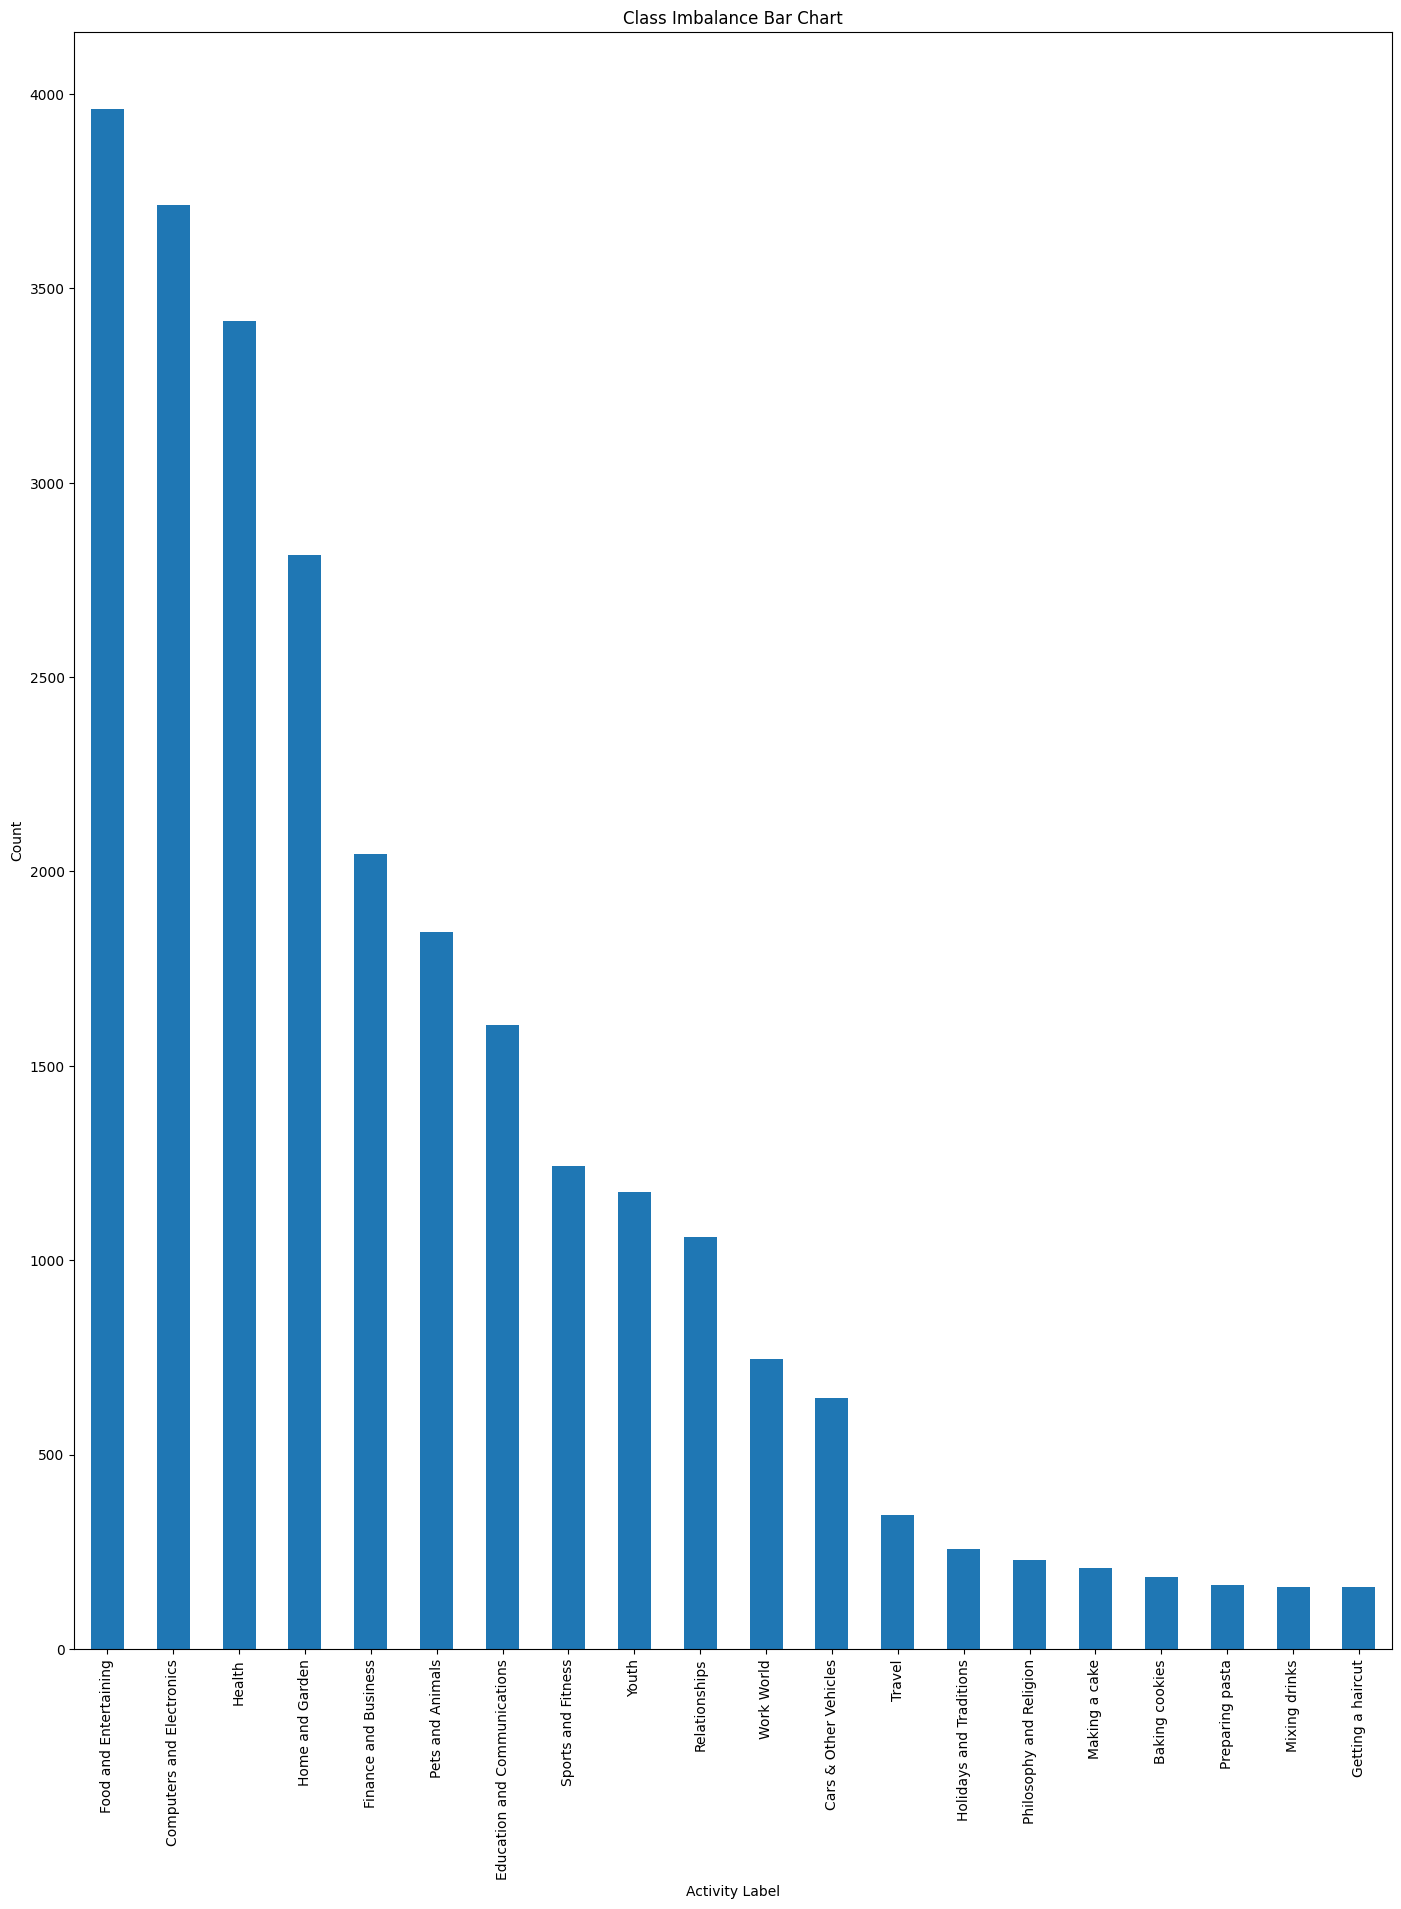

In [31]:
# plot the class imbalance bar chart for 20 largest classes in the activity_label column
train_df_eda['activity_label'].value_counts(normalize=False)[:20].plot(kind='bar', figsize=(17, 21))
plt.title('Class Imbalance Bar Chart') # add a title
plt.xlabel('Activity Label') # add x and y labels
plt.ylabel('Count')
# save the plot
#plt.savefig('/Users/jyotir/DataspellProjects/NLP-Project/EDA/class_imbalance_bar_chart_BIG.png')
plt.show()

In [32]:
# # plot the class imbalance pie chart for 10 largest classes in the activity_label column with percentage values
# train_df['activity_label'].value_counts(normalize=True)[:30].plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%')
# # add a title
# plt.title('Class Imbalance Pie Chart')
# plt.show()

# # plot the class imbalance pie chart making it more readable
# train_df['activity_label'].value_counts().plot(kind='pie', figsize=(10, 10))
# # add a title
# plt.title('Class Imbalance Pie Chart')
# plt.show()

# # plot the class imbalance bar chart making it more readable
# train_df['activity_label'].value_counts().plot(kind='bar', figsize=(10, 10))
# plt.title('Class Imbalance Bar Chart') # add a title
# plt.xlabel('Activity Label') # add x and y labels
# plt.ylabel('Count')
# plt.show()

In [33]:
train_df_eda['ctx'][0].split()
len(train_df_eda['ctx'][0])

70

In [34]:
# store the 20 most frequent classes in the activity_label column
top_20_classes_list = list(train_df_eda['activity_label'].value_counts()[:20].index)
top_20_classes_list

['Food and Entertaining',
 'Computers and Electronics',
 'Health',
 'Home and Garden',
 'Finance and Business',
 'Pets and Animals',
 'Education and Communications',
 'Sports and Fitness',
 'Youth',
 'Relationships',
 'Work World',
 'Cars & Other Vehicles',
 'Travel',
 'Holidays and Traditions',
 'Philosophy and Religion',
 'Making a cake',
 'Baking cookies',
 'Preparing pasta',
 'Mixing drinks',
 'Getting a haircut']

In [35]:
top_20_classes_list_count = train_df_eda['activity_label'].value_counts()[:20]
top_20_classes_list_count

Food and Entertaining           3962
Computers and Electronics       3715
Health                          3415
Home and Garden                 2813
Finance and Business            2046
Pets and Animals                1843
Education and Communications    1604
Sports and Fitness              1242
Youth                           1176
Relationships                   1060
Work World                       746
Cars & Other Vehicles            646
Travel                           344
Holidays and Traditions          258
Philosophy and Religion          228
Making a cake                    207
Baking cookies                   184
Preparing pasta                  164
Mixing drinks                    160
Getting a haircut                159
Name: activity_label, dtype: int64

In [36]:
top_20_classes_average_sentence_length = {}
top_20_classes_word_count = {}
for i in top_20_classes_list:
    top_20_classes_average_sentence_length[i] = 0
    top_20_classes_word_count[i] = 0


In [37]:
# calculate the average sentence length for 20 largest classes in the activity_label column
for i in range(len(train_df_eda)):
    activity_class = train_df_eda['activity_label'][i]
    if(activity_class in top_20_classes_list):
        top_20_classes_average_sentence_length[activity_class] += len(train_df_eda['ctx'][i])
        top_20_classes_word_count[activity_class] += len(train_df_eda['ctx'][i].split())

for i in top_20_classes_list:
    top_20_classes_average_sentence_length[i] /= top_20_classes_list_count[i]


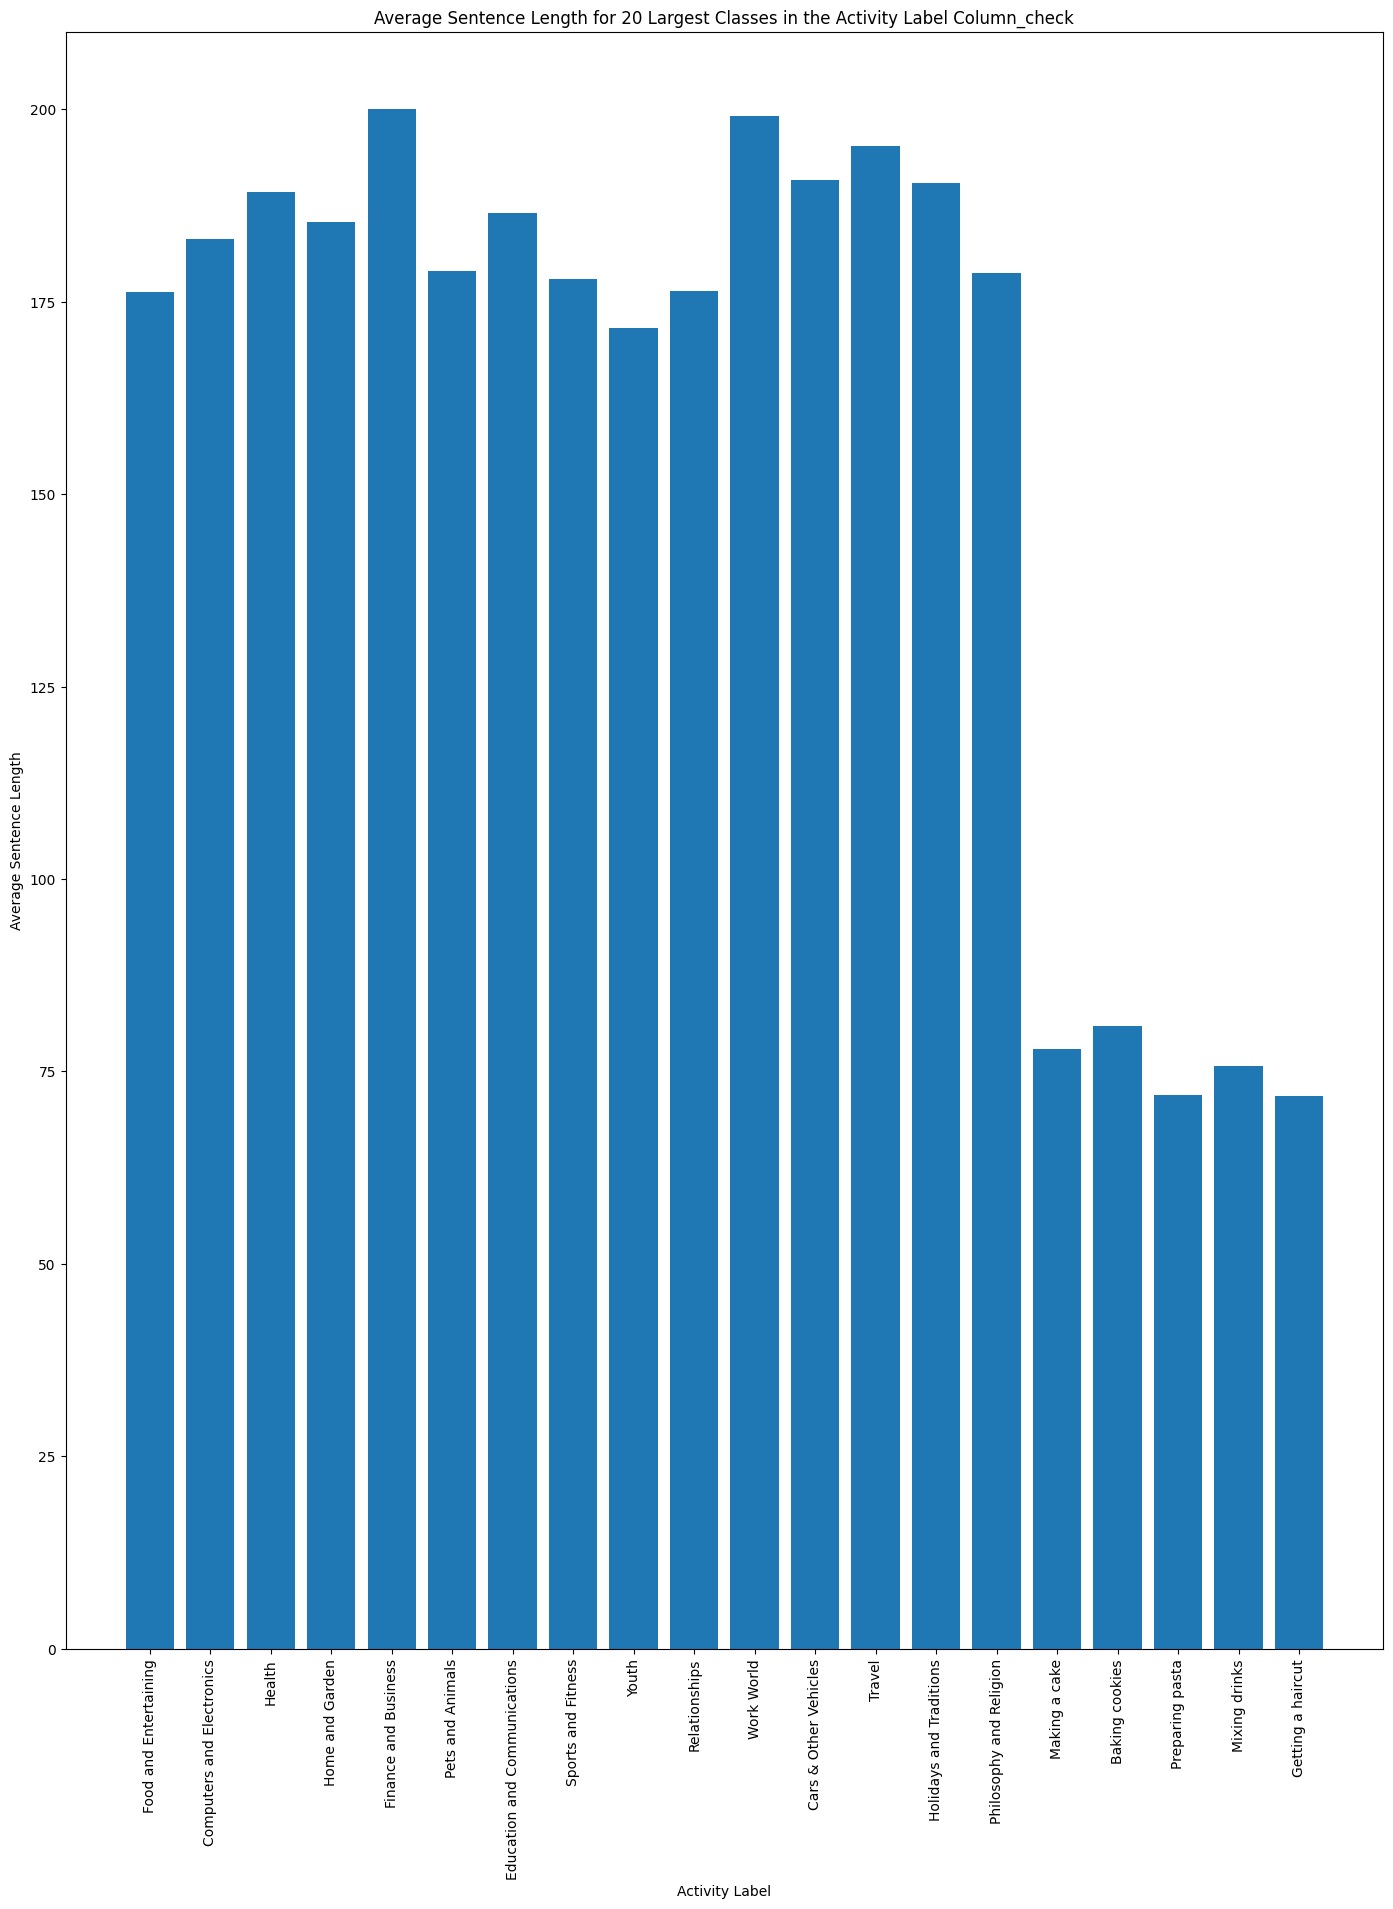

In [38]:
# plot the top_20_classes_average_sentence_length dictionary as a bar chart
plt.figure(figsize=(17, 21))
plt.bar(range(len(top_20_classes_average_sentence_length)), list(top_20_classes_average_sentence_length.values()), align='center')
# make labels size smaller
plt.xticks(range(len(top_20_classes_average_sentence_length)), list(top_20_classes_average_sentence_length.keys()), rotation=90)
plt.title('Average Sentence Length for 20 Largest Classes in the Activity Label Column_check')
plt.xlabel('Activity Label')
plt.ylabel('Average Sentence Length')
#plt.savefig('/Users/jyotir/DataspellProjects/NLP-Project/EDA/average_sentence_length.png')
plt.show()

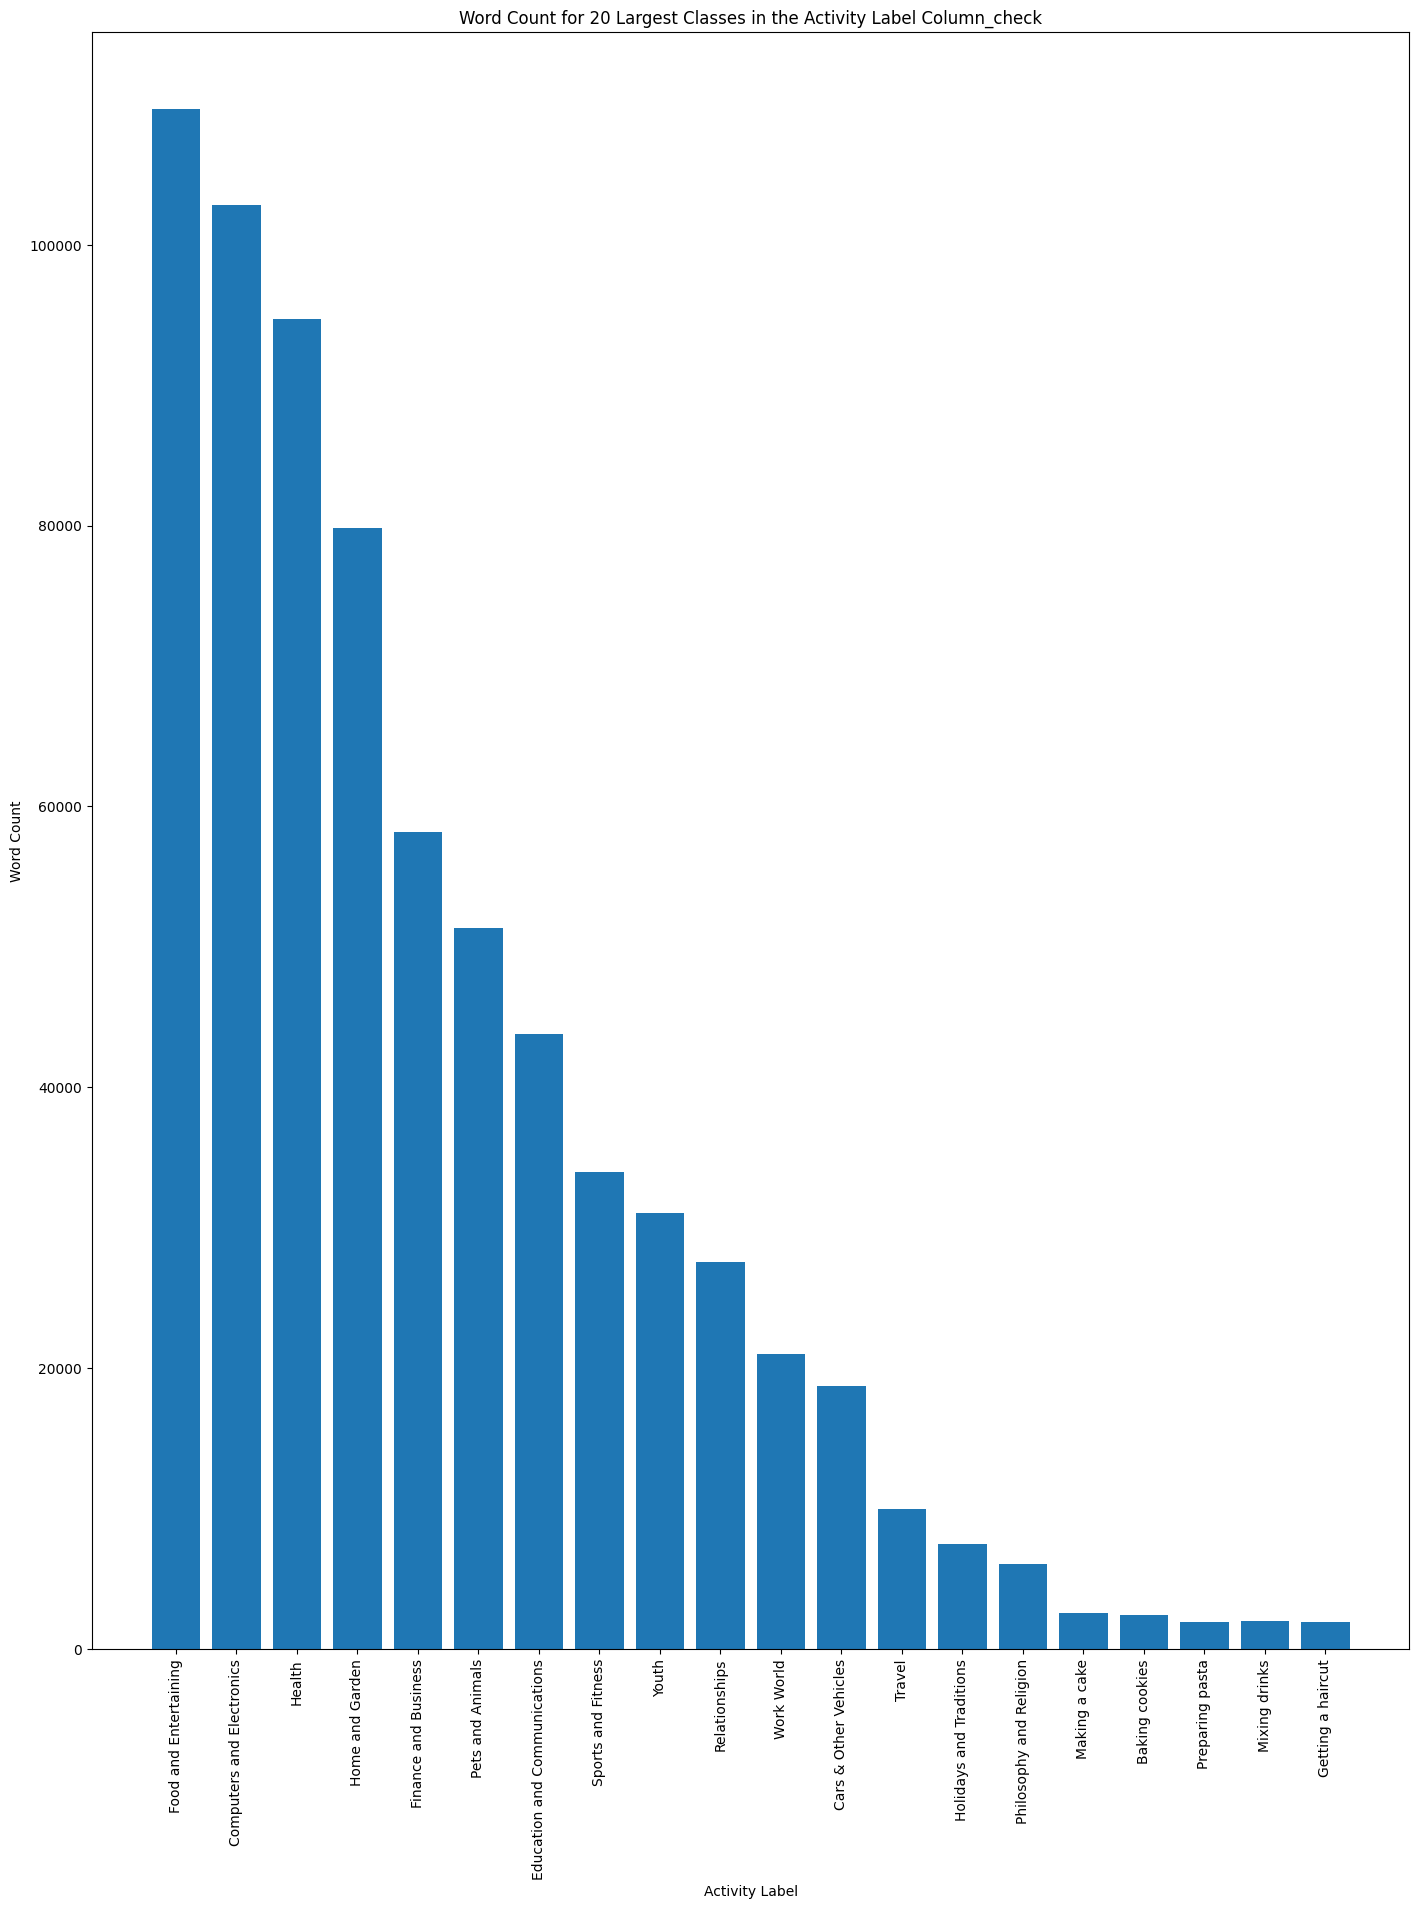

In [39]:
# plot the top_20_classes_word_count dictionary as a bar chart
plt.figure(figsize=(17, 21))
plt.bar(range(len(top_20_classes_word_count)), list(top_20_classes_word_count.values()), align='center')
plt.xticks(range(len(top_20_classes_word_count)), list(top_20_classes_word_count.keys()), rotation=90)
plt.title('Word Count for 20 Largest Classes in the Activity Label Column_check')
plt.xlabel('Activity Label')
plt.ylabel('Word Count')
#plt.savefig('/Users/jyotir/DataspellProjects/NLP-Project/EDA/word_count.png')
plt.show()

In [ ]:
# # calculate the number of words in each row of the ctx column for 20 largest classes in the activity_label column and plot a bar chart
# train_df_eda['ctx'].str.split().apply(len).value_counts()[:20].plot(kind='bar', figsize=(10, 10))
# plt.title('Number of Words in Each Row of the ctx Column') # add a title
# plt.xlabel('Number of Words') # add x and y labels
# plt.ylabel('Count')
# plt.show()

In [40]:
# find the 20 most frequent words in the ctx column
from collections import Counter
top_20_words_counter = Counter(" ".join(train_df_eda['ctx']).split()).most_common(20)
top_20_words_counter

[('title', 30063),
 ('header', 25179),
 ('step', 24822),
 ('man', 8428),
 ('make', 7039),
 ('get', 4811),
 ('people', 4082),
 ('woman', 4007),
 ('use', 3932),
 ('one', 3726),
 ('need', 3469),
 ('water', 3397),
 ('person', 2824),
 ('time', 2658),
 ('may', 2654),
 ('want', 2647),
 ('dog', 2636),
 ('take', 2613),
 ('two', 2560),
 ('start', 2519)]

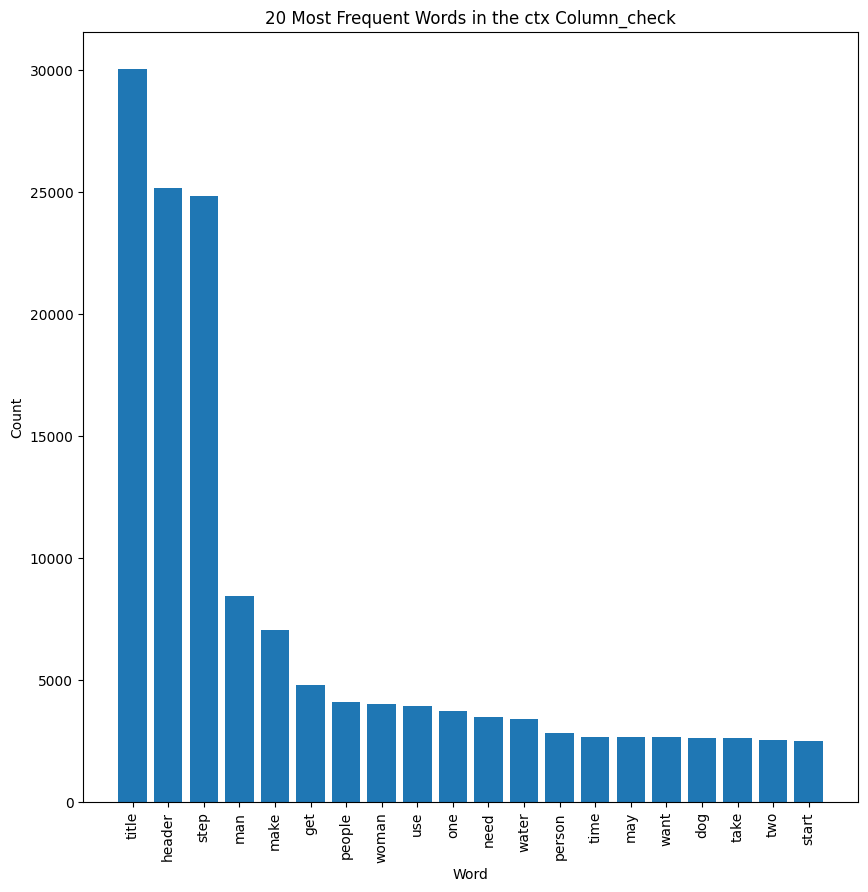

In [41]:
# plot the top_20_words_counter dictionary as a bar chart
plt.figure(figsize=(10, 10))
plt.bar(range(len(top_20_words_counter)), [val[1] for val in top_20_words_counter], align='center')
plt.xticks(range(len(top_20_words_counter)), [val[0] for val in top_20_words_counter], rotation=90)
plt.title('20 Most Frequent Words in the ctx Column_check')
plt.xlabel('Word')
plt.ylabel('Count')
#plt.savefig('/Users/jyotir/DataspellProjects/NLP-Project/EDA/20_most_frequent_words.png')
plt.show()

In [42]:
# find 20 most occuring bigrams in the ctx column
from nltk import ngrams
top_20_bigrams_counter = Counter(ngrams(" ".join(train_df_eda['ctx']).split(), 2)).most_common(20)
top_20_bigrams_counter

[(('header', 'make'), 2710),
 (('make', 'sure'), 1532),
 (('header', 'get'), 1219),
 (('title', 'choose'), 847),
 (('title', 'get'), 836),
 (('title', 'make'), 812),
 (('man', 'man'), 774),
 (('title', 'find'), 727),
 (('title', 'use'), 696),
 (('header', 'use'), 650),
 (('header', 'clean'), 561),
 (('title', 'look'), 508),
 (('title', 'take'), 505),
 (('title', 'determine'), 499),
 (('title', 'open'), 477),
 (('title', 'check'), 473),
 (('title', 'decide'), 464),
 (('two', 'men'), 463),
 (('youll', 'need'), 442),
 (('title', 'understand'), 430)]

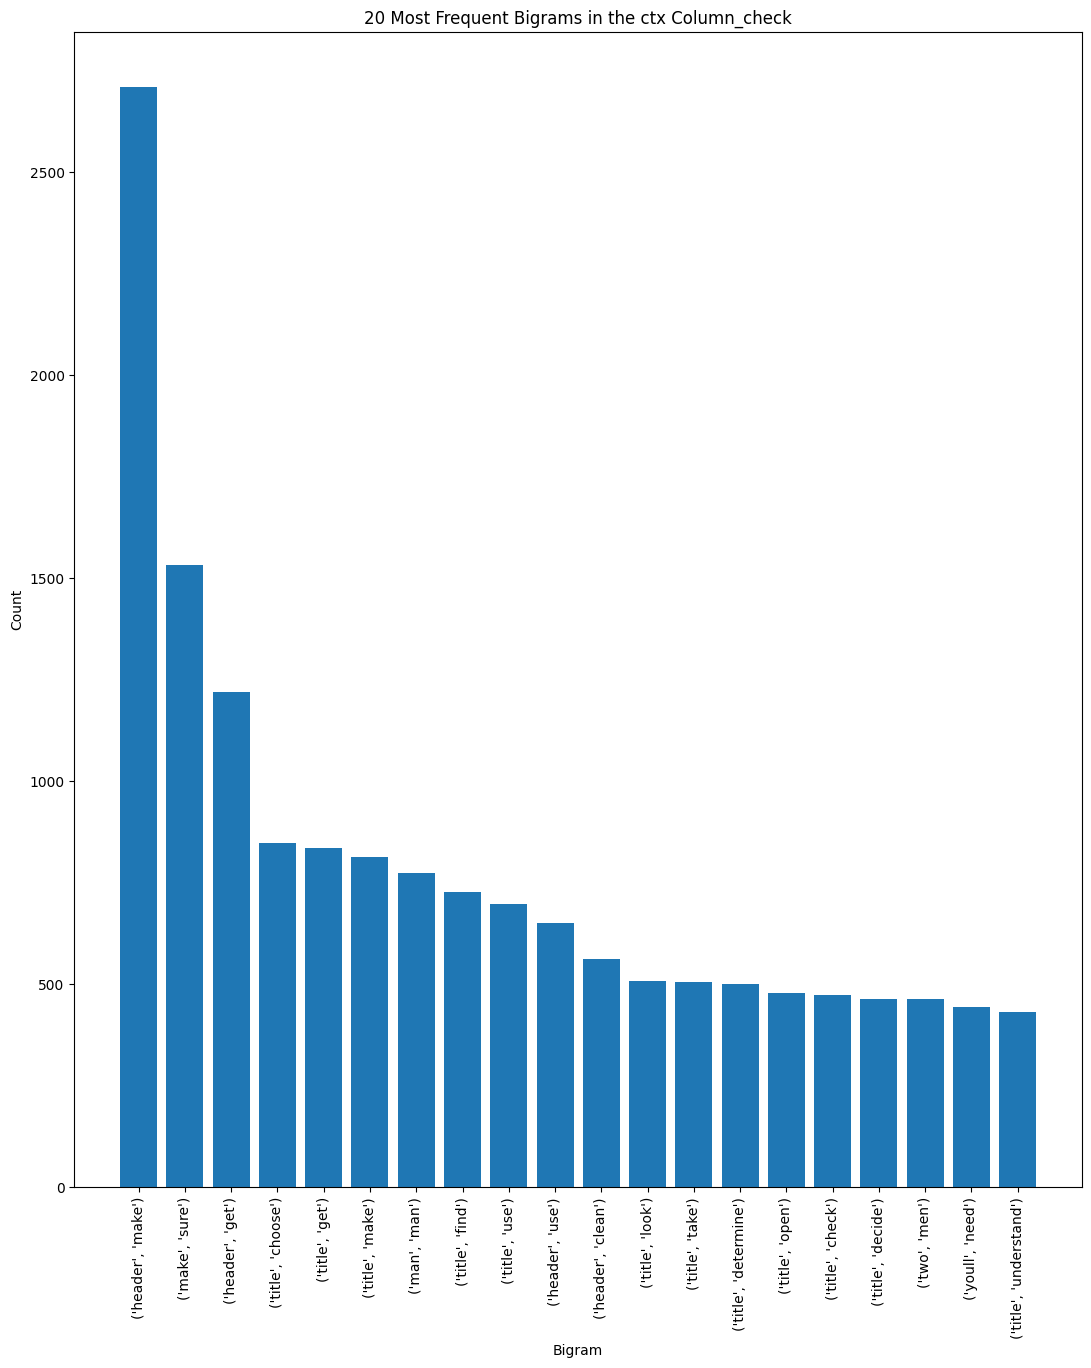

In [43]:
# plot the top_20_bigrams_counter dictionary as a bar chart
plt.figure(figsize=(13, 15))
plt.bar(range(len(top_20_bigrams_counter)), [val[1] for val in top_20_bigrams_counter], align='center')
plt.xticks(range(len(top_20_bigrams_counter)), [val[0] for val in top_20_bigrams_counter], rotation=90)
plt.title('20 Most Frequent Bigrams in the ctx Column_check')
plt.xlabel('Bigram')
plt.ylabel('Count')
#plt.savefig('/Users/jyotir/DataspellProjects/NLP-Project/EDA/20_most_frequent_bigrams.png')
plt.show()

In [44]:
# find 20 most occuring trigrams in the ctx column
top_20_trigrams_counter = Counter(ngrams(" ".join(train_df_eda['ctx']).split(), 3)).most_common(20)
top_20_trigrams_counter

[(('title', 'make', 'sure'), 377),
 (('title', 'preheat', 'oven'), 278),
 (('header', 'get', 'rid'), 219),
 (('step', 'make', 'sure'), 218),
 (('seen', 'speaking', 'camera'), 189),
 (('group', 'people', 'seen'), 134),
 (('large', 'group', 'people'), 108),
 (('man', 'seen', 'speaking'), 101),
 (('step', 'first', 'step'), 101),
 (('preheat', 'oven', '350'), 84),
 (('title', 'decide', 'want'), 78),
 (('title', 'wash', 'hand'), 72),
 (('woman', 'seen', 'speaking'), 68),
 (('camera', 'pan', 'around'), 66),
 (('come', 'onto', 'screen'), 66),
 (('title', 'make', 'list'), 63),
 (('header', 'take', 'care'), 63),
 (('step', 'many', 'people'), 63),
 (('man', 'man', 'seen'), 62),
 (('step', 'youll', 'need'), 62)]

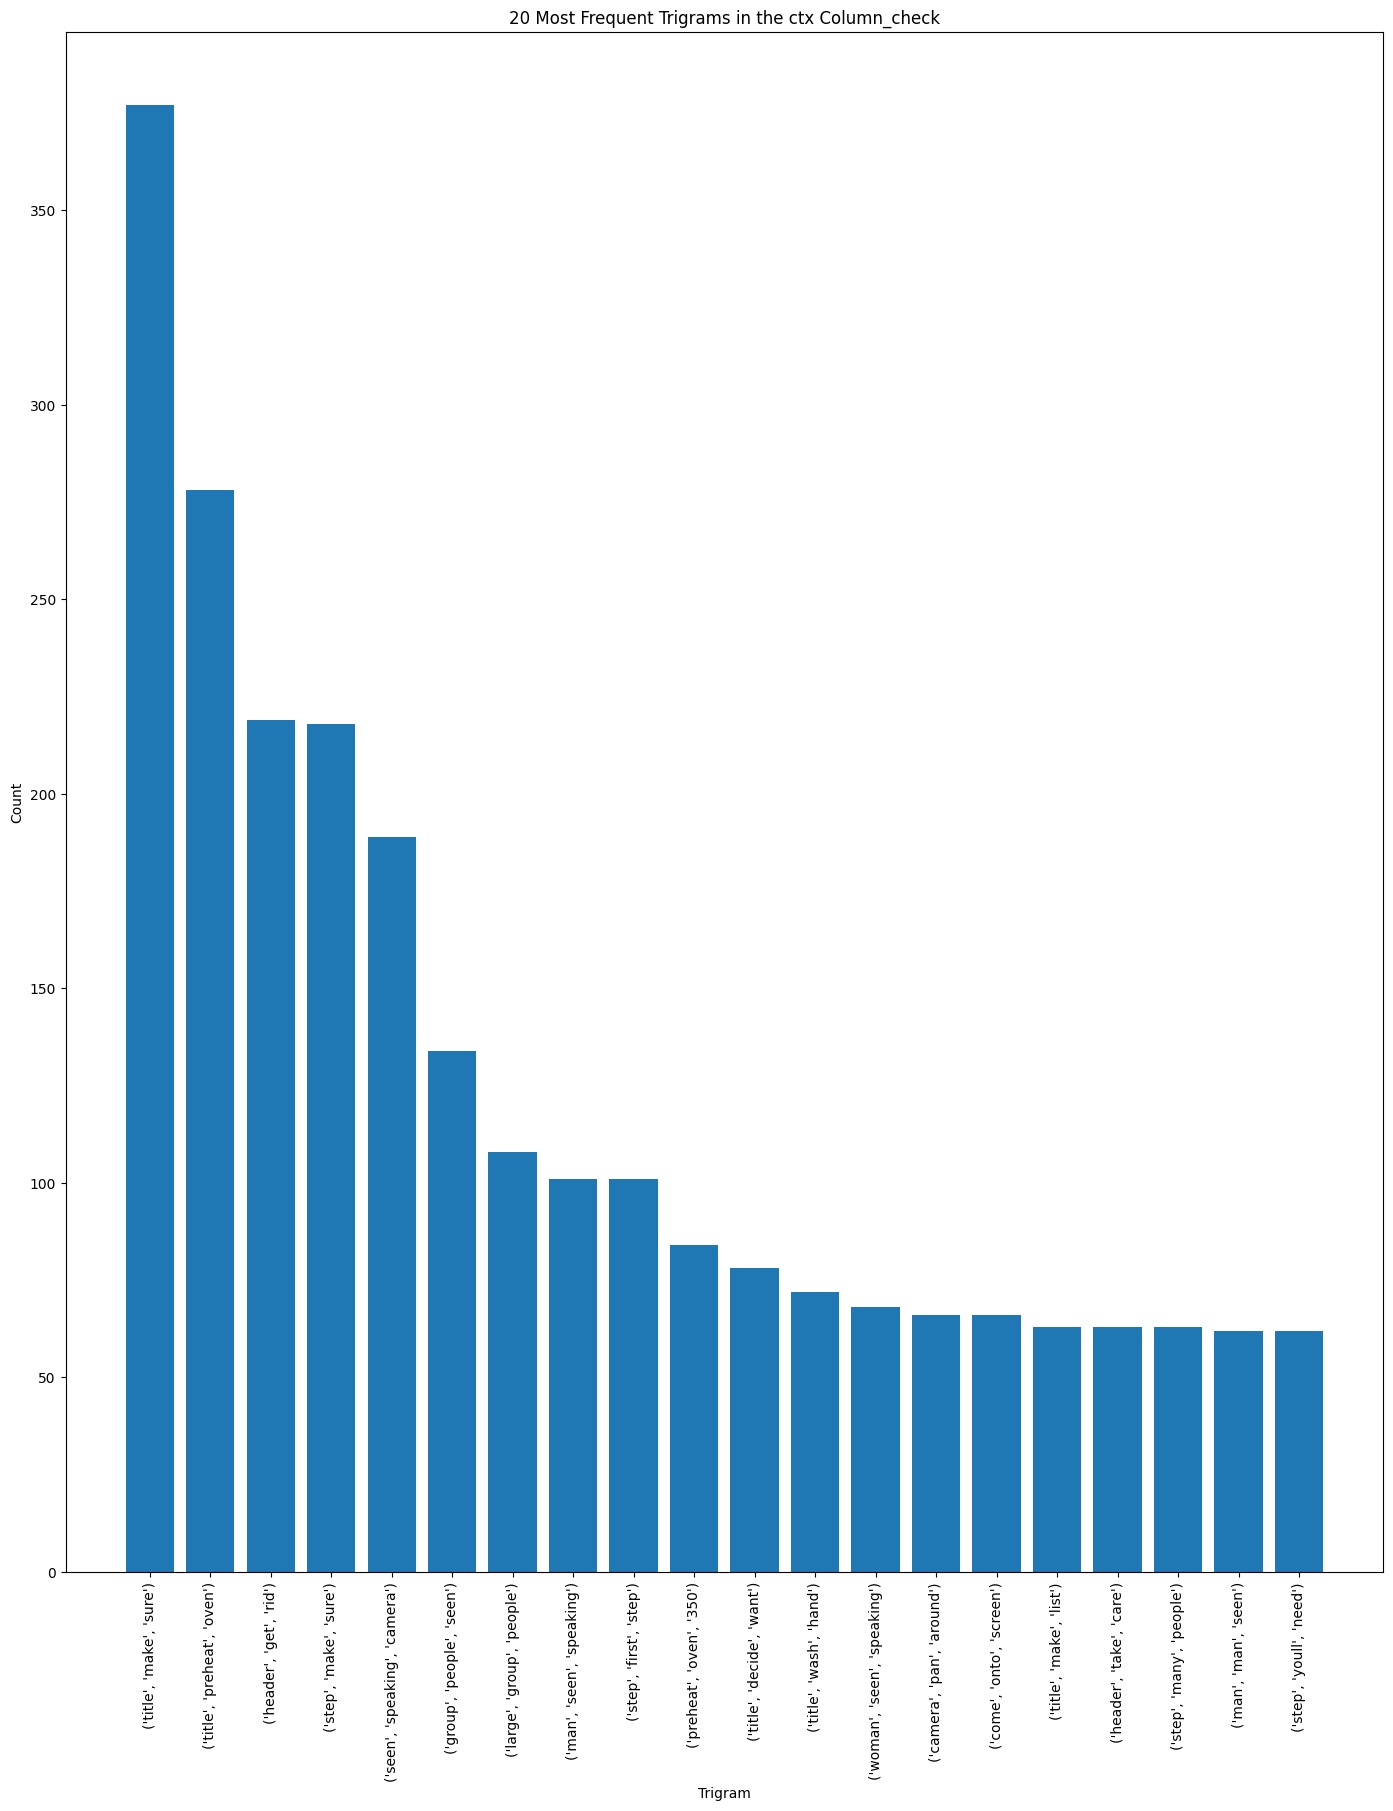

In [45]:
# plot the top_20_trigrams_counter dictionary as a bar chart
plt.figure(figsize=(17, 20))
plt.bar(range(len(top_20_trigrams_counter)), [val[1] for val in top_20_trigrams_counter], align='center')
plt.xticks(range(len(top_20_trigrams_counter)), [val[0] for val in top_20_trigrams_counter], rotation=90)
plt.title('20 Most Frequent Trigrams in the ctx Column_check')
plt.xlabel('Trigram')
plt.ylabel('Count')
#plt.savefig('/Users/jyotir/DataspellProjects/NLP-Project/EDA/20_most_frequent_trigrams.png')
plt.show()

[(('man', 'seen', 'speaking', 'camera'), 96), (('large', 'group', 'people', 'seen'), 78), (('woman', 'seen', 'speaking', 'camera'), 64), (('group', 'people', 'seen', 'standing'), 50), (('introduction', 'come', 'onto', 'screen'), 46), (('seen', 'speaking', 'camera', 'holding'), 43), (('small', 'group', 'people', 'seen'), 39), (('introduction', 'come', 'onto', 'screen', 'video'), 37), (('come', 'onto', 'screen', 'video'), 37), (('title', 'gather', 'supply', 'step'), 36), (('title', 'gather', 'material', 'step'), 36), (('seen', 'speaking', 'camera', 'lead'), 35), (('title', 'talk', 'doctor', 'step'), 35), (('people', 'seen', 'standing', 'around'), 33), (('cake', 'title', 'preheat', 'oven'), 31), (('see', 'opening', 'title', 'screen'), 30), (('group', 'people', 'seen', 'standing', 'around'), 29), (('title', 'preheat', 'oven', 'step'), 28), (('large', 'group', 'people', 'seen', 'standing'), 25), (('title', 'wash', 'hand', 'step'), 24)]


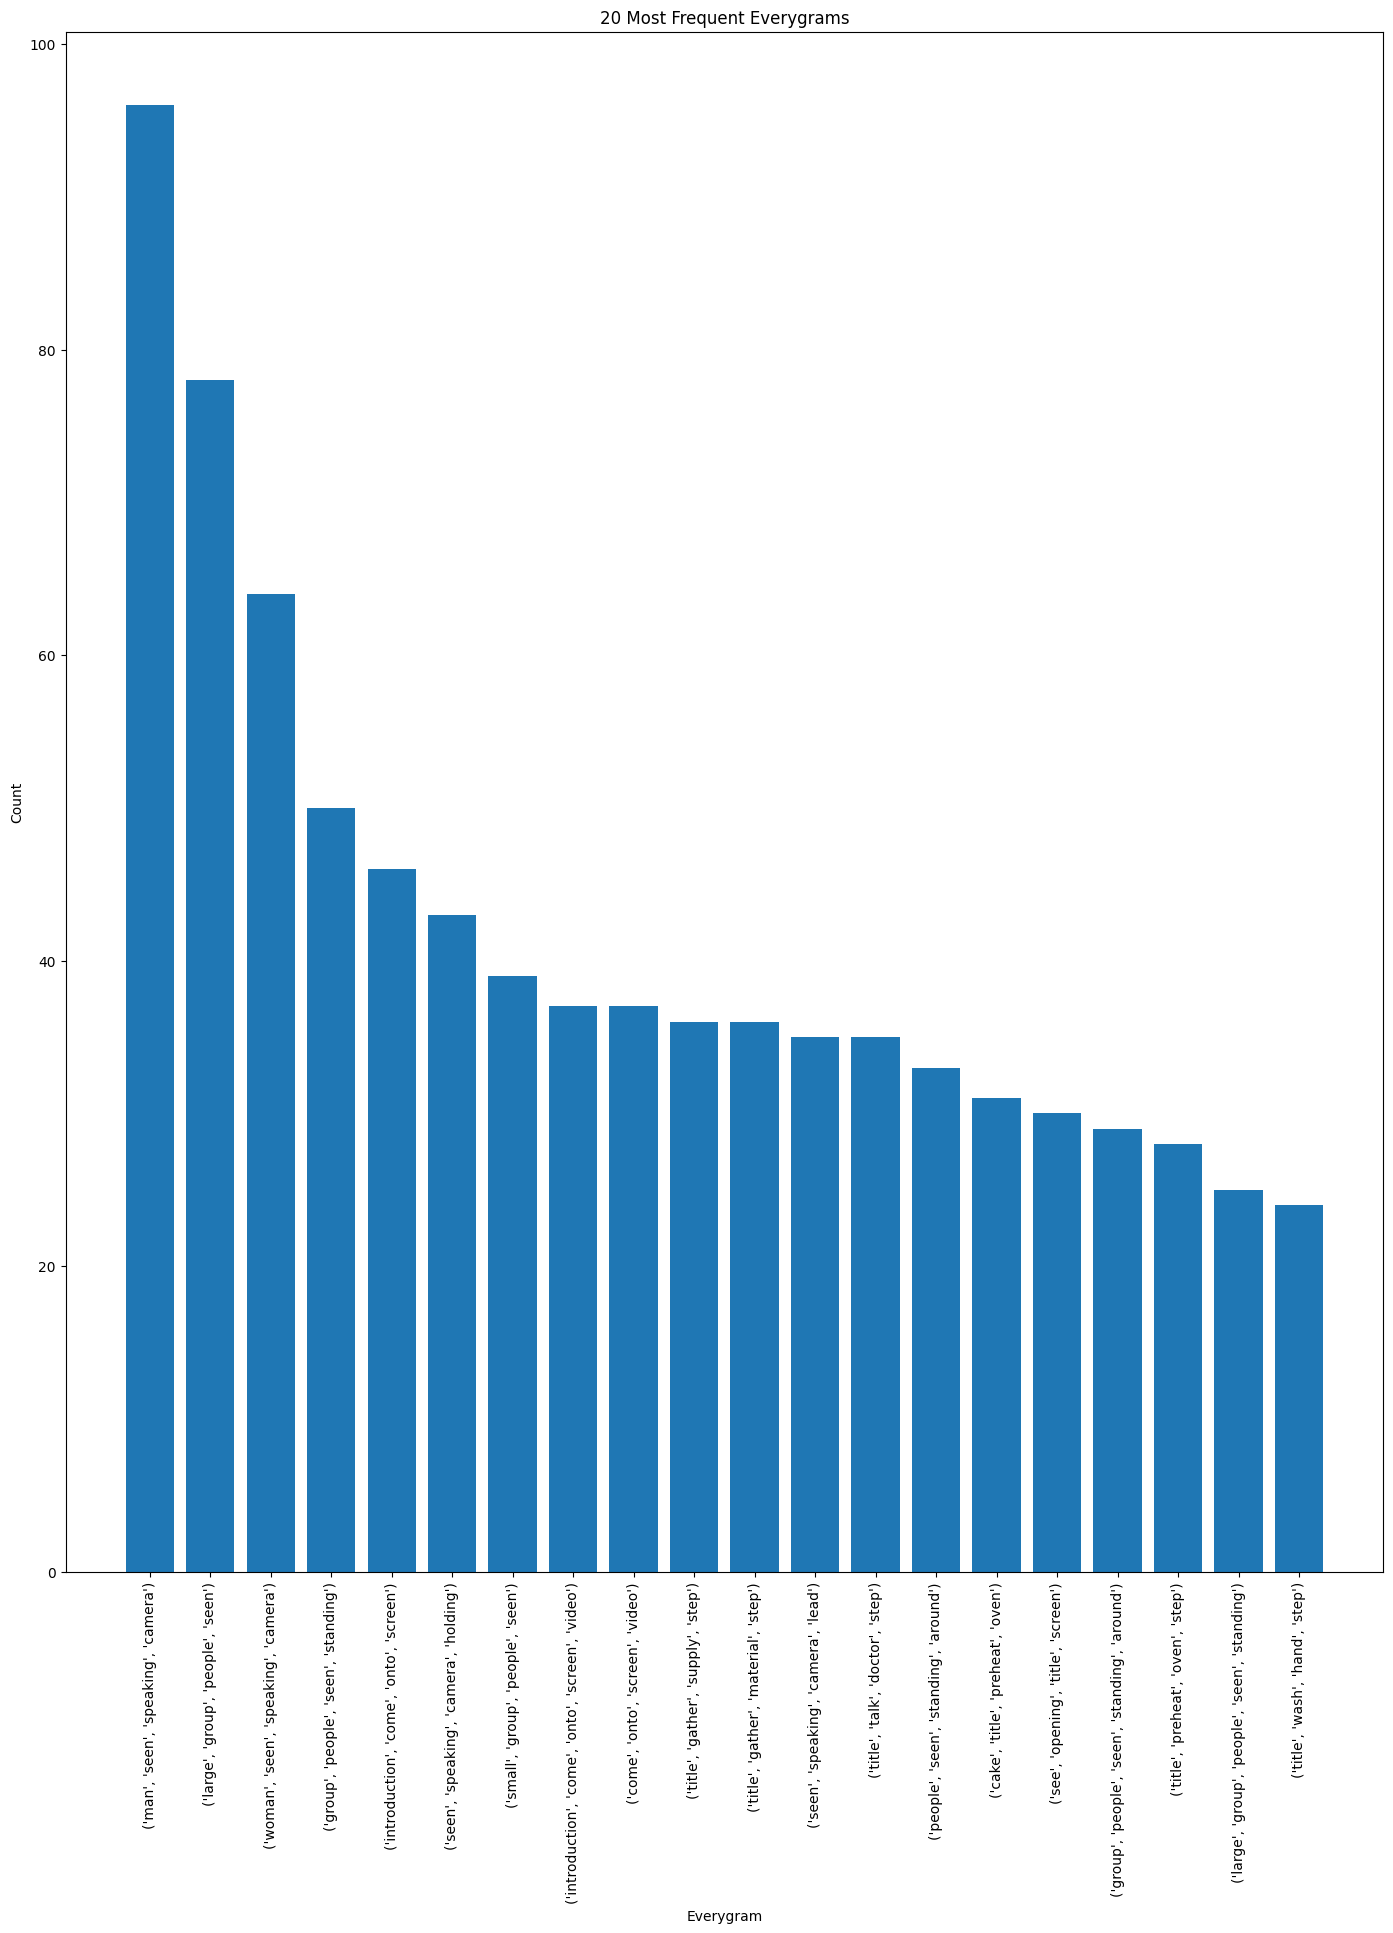

In [46]:
from nltk.util import everygrams
all_ctx_everygrams = [gram for item in train_df_eda['ctx'] for gram in everygrams(item.split(), min_len=4, max_len=7)]
filtered_everygrams = [gram for gram in all_ctx_everygrams if not any(word.isdigit() for word in gram)]


# Count the occurrences of everygram
everygram_counter = Counter(filtered_everygrams)

# Get the top 20 most common everygrams
top_20_everygrams_counter = everygram_counter.most_common(20)

# Print the top 20 everygrams
print(top_20_everygrams_counter)

# Plot the top 20 everygrams
plt.figure(figsize=(17, 20))
plt.bar(range(len(top_20_everygrams_counter)), [val[1] for val in top_20_everygrams_counter], align='center')
plt.xticks(range(len(top_20_everygrams_counter)), [val[0] for val in top_20_everygrams_counter], rotation=90)
plt.title('20 Most Frequent Everygrams')
plt.xlabel('Everygram')
plt.ylabel('Count')
plt.show()

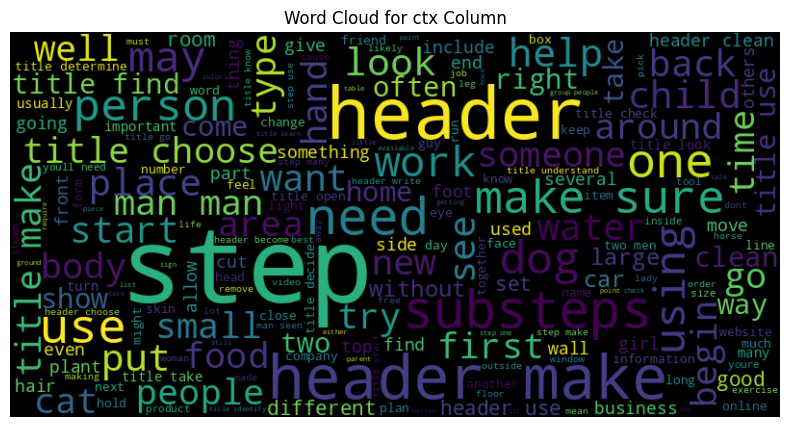

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate and display word cloud for 'ctx' column
ctx_text = " ".join(train_df_eda['ctx'])
generate_word_cloud(ctx_text, 'Word Cloud for ctx Column')

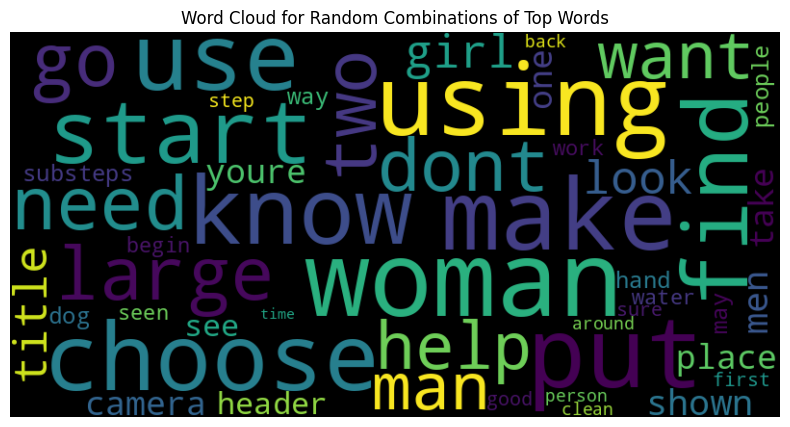

In [49]:
# Import required libraries for WordCloud and random sampling
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# Function to generate and display a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

# Create a list of the most frequent words from the 'ctx' column
top_words_list = [word for word, count in Counter(ctx_text.split()).most_common(50)]

# Randomly sample combinations of these words
num_combinations = 100  # Adjust as needed
random_combinations = [" ".join(random.sample(top_words_list, k=random.randint(2, 5))) for _ in range(num_combinations)]

# Concatenate the sampled combinations into a single string
random_combinations_text = " ".join(random_combinations)

# Generate and display word cloud for the sampled combinations
generate_word_cloud(random_combinations_text, 'Word Cloud for Random Combinations of Top Words')


In [ ]:
# # plot using seaborn
# sns.barplot(x=[val[0] for val in top_20_words_counter], y=[val[1] for val in top_20_words_counter])
# plt.title('20 Most Frequent Words in the ctx Column')
# plt.xlabel('Word')
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
from collections import Counter
from itertools import chain

def extract_evergrams(data):
    unigrams = data.split()  # Extract individual words as unigrams
    bigrams = [f"{unigrams[i]} {unigrams[i+1]}" for i in range(len(unigrams) - 1)]  # Create bigrams
    trigrams = [f"{unigrams[i]} {unigrams[i+1]} {unigrams[i+2]}" for i in range(len(unigrams) - 2)]  # Create trigrams
    evergrams = unigrams + bigrams + trigrams  # Combine all three

    return Counter(evergrams)

# Example usage
data = "Your input text goes here. This is a simple example."
evergrams_counter = extract_evergrams(data)

# Print the most common 20 evergrams
top_20_evergrams = evergrams_counter.most_common(20)
for evergram, count in top_20_evergrams:
    print(f"{evergram}: {count}")


Your: 1
input: 1
text: 1
goes: 1
here.: 1
This: 1
is: 1
a: 1
simple: 1
example.: 1
Your input: 1
input text: 1
text goes: 1
goes here.: 1
here. This: 1
This is: 1
is a: 1
a simple: 1
simple example.: 1
Your input text: 1
